You can download the dataset from [here](https://www.kaggle.com/mchirico/montcoalert)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
dataset = pd.read_csv('911.csv')
timestamp = dataset['timeStamp'].iloc[:].values
for i in xrange(timestamp.shape[0]):
    timestamp[i] = timestamp[i].split(' ')[0]
    
unique_date, freq_date = np.unique(timestamp, return_counts = True)

In [10]:
skip = unique_date.shape[0] // 5
skip_array = [i for i in xrange(0, unique_date.shape[0], skip)]
skip_date = [unique_date[i] for i in xrange(0, unique_date.shape[0], skip)]

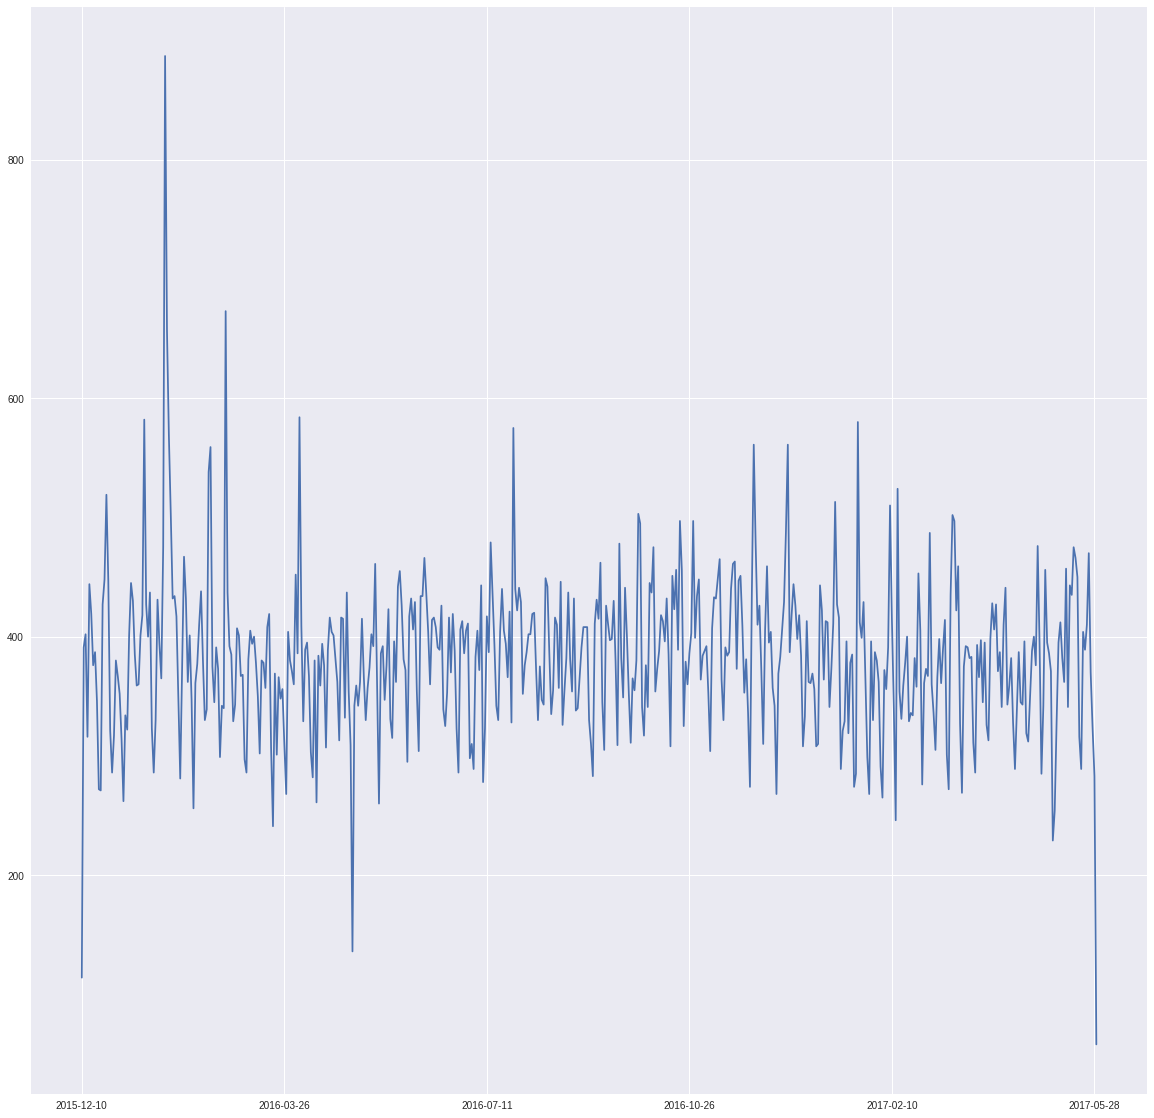

In [11]:
plt.figure(figsize = (20,20))
plt.plot([i for i in xrange(freq_date.shape[0])], freq_date)
plt.xticks(skip_array, skip_date)
plt.show()

In [15]:
cause = dataset['title'].iloc[:].values
unique_cause, freq_cause = np.unique(cause, return_counts = True)

for i in xrange(unique_cause.shape[0]):
    print unique_cause[i] + ': ' + str(freq_cause[i])

EMS: ABDOMINAL PAINS: 2975
EMS: ACTIVE SHOOTER: 2
EMS: ALLERGIC REACTION: 888
EMS: ALTERED MENTAL STATUS: 2979
EMS: AMPUTATION: 35
EMS: ANIMAL BITE: 163
EMS: APPLIANCE FIRE: 20
EMS: ARMED SUBJECT: 2
EMS: ASSAULT VICTIM: 1313
EMS: BACK PAINS/INJURY: 1615
EMS: BOMB DEVICE FOUND: 3
EMS: BUILDING FIRE: 438
EMS: BURN VICTIM: 91
EMS: CARBON MONOXIDE DETECTOR: 157
EMS: CARDIAC ARREST: 1365
EMS: CARDIAC EMERGENCY: 10337
EMS: CHOKING: 373
EMS: CVA/STROKE: 2579
EMS: DEBRIS/FLUIDS ON HIGHWAY: 4
EMS: DEHYDRATION: 510
EMS: DIABETIC EMERGENCY: 1803
EMS: DISABLED VEHICLE: 1
EMS: DIZZINESS: 1660
EMS: DROWNING: 7
EMS: ELECTRICAL FIRE OUTSIDE: 5
EMS: ELECTROCUTION: 7
EMS: EMS SPECIAL SERVICE: 243
EMS: EYE INJURY: 74
EMS: FALL VICTIM: 10338
EMS: FEVER: 985
EMS: FIRE ALARM: 31
EMS: FIRE INVESTIGATION: 37
EMS: FIRE POLICE NEEDED: 1
EMS: FIRE SPECIAL SERVICE: 101
EMS: FRACTURE: 1392
EMS: GAS-ODOR/LEAK: 88
EMS: GENERAL WEAKNESS: 3180
EMS: HAZARDOUS MATERIALS INCIDENT: 17
EMS: HEAD INJURY: 5348
EMS: HEAT EXHA

In [21]:
datecause = dataset[['title', 'timeStamp']].values
ems, fire, traffic = [], [], []
for i in xrange(unique_date.shape[0]):
    ems_cause, fire_cause, traffic_cause = 0, 0, 0
    for x in xrange(datecause.shape[0]):
        if datecause[x, 1] == unique_date[i]:
            if datecause[x, 0].find('EMS') >= 0:
                ems_cause += 1
            if datecause[x, 0].find('Fire') >= 0:
                fire_cause += 1
            if datecause[x, 0].find('Traffic') >= 0:
                traffic_cause += 1
    
    ems.append(ems_cause)
    fire.append(fire_cause)
    traffic.append(traffic_cause)

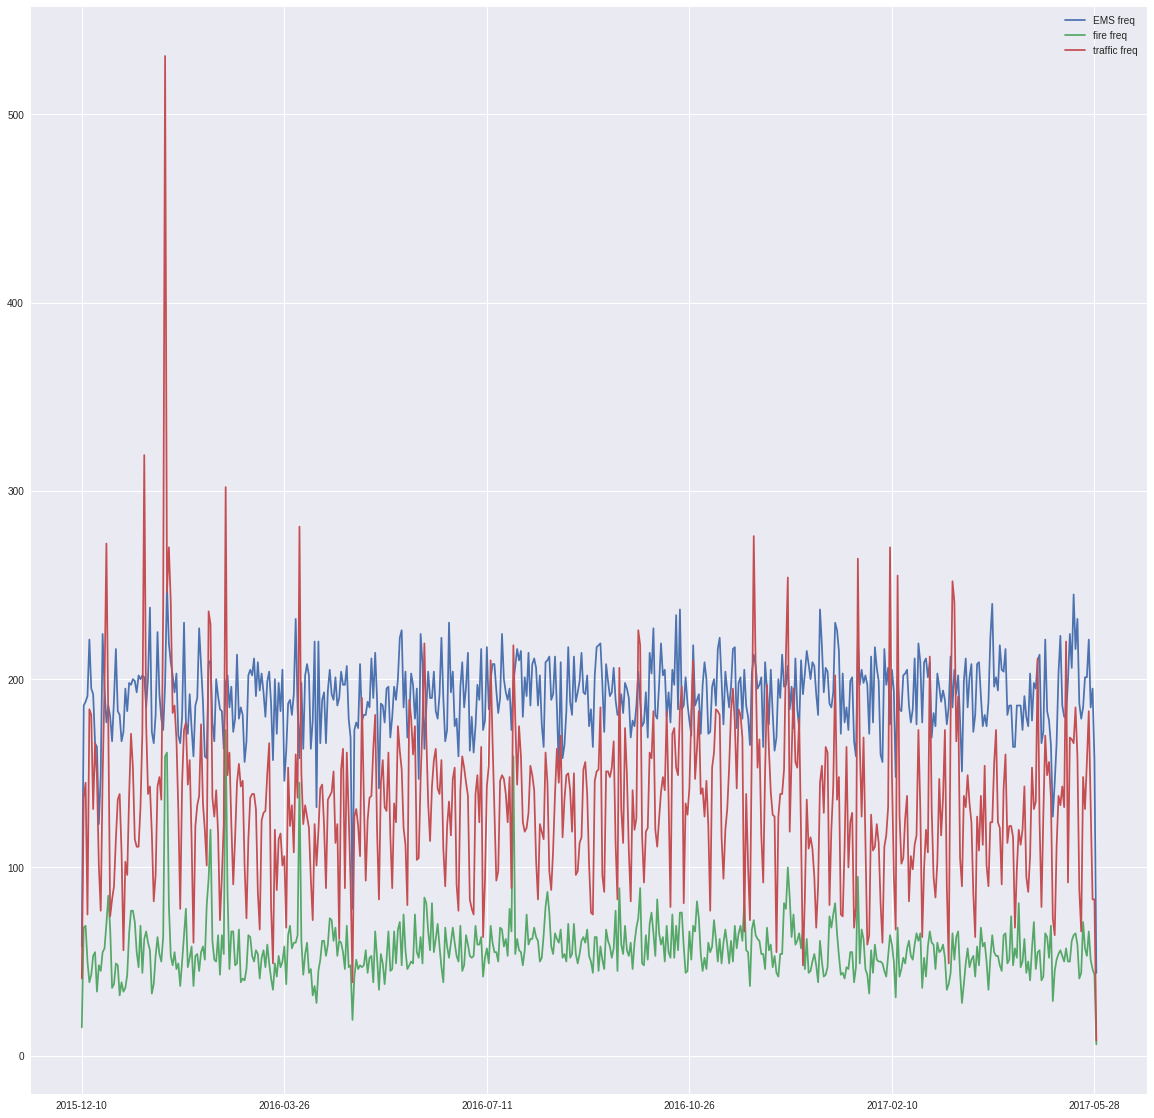

In [23]:
plt.figure(figsize = (20, 20))
plt.plot([i for i in xrange(freq_date.shape[0])], ems, label = 'EMS freq')
plt.plot([i for i in xrange(freq_date.shape[0])], fire, label = 'fire freq')
plt.plot([i for i in xrange(freq_date.shape[0])], traffic, label = 'traffic freq')
plt.xticks(skip_array, skip_date)
plt.legend()
plt.show()

In [27]:
'-'.join('2015-12-10'.split('-')[:2])

'2015-12'

In [28]:
months = np.copy(timestamp)
for i in xrange(months.shape[0]):
    months[i] = '-'.join(months[i].split('-')[:2])
    
unique_months, freq_months = np.unique(months, return_counts = True)

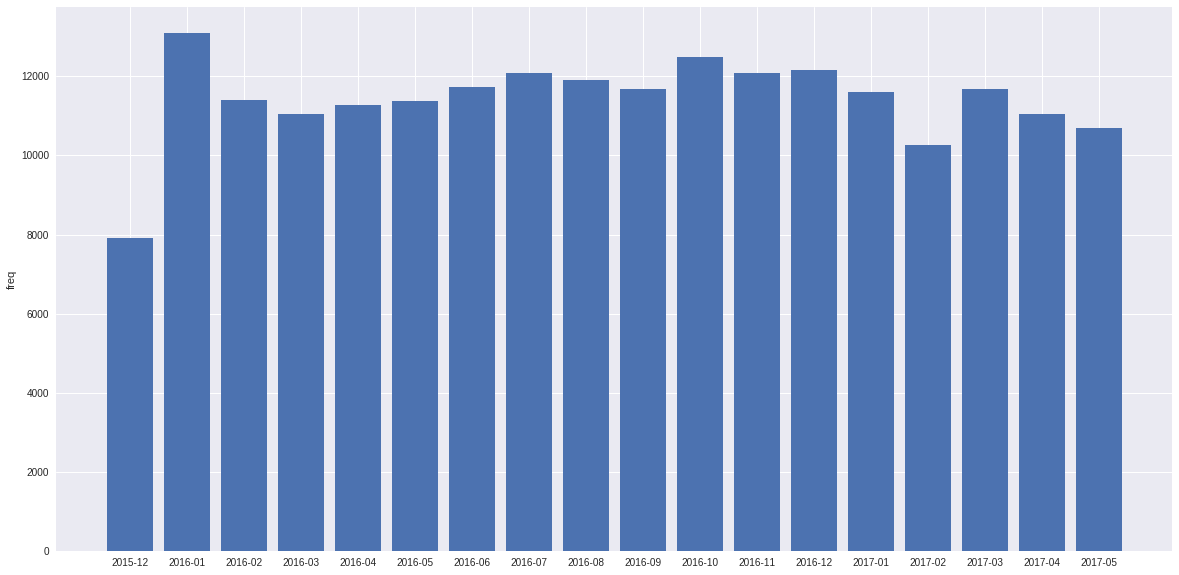

In [33]:
plt.figure(figsize = (20, 10))
y = np.arange(freq_months.shape[0])
plt.bar(y, freq_months)
plt.xticks(y, unique_months)
plt.ylabel('freq')
plt.show()

In [49]:
cause = dataset['title'].iloc[:].values
for i in xrange(cause.shape[0]):
    cause[i] = cause[i].split(':')[0]
    
unique_cause, freq_cause = np.unique(cause, return_counts = True)

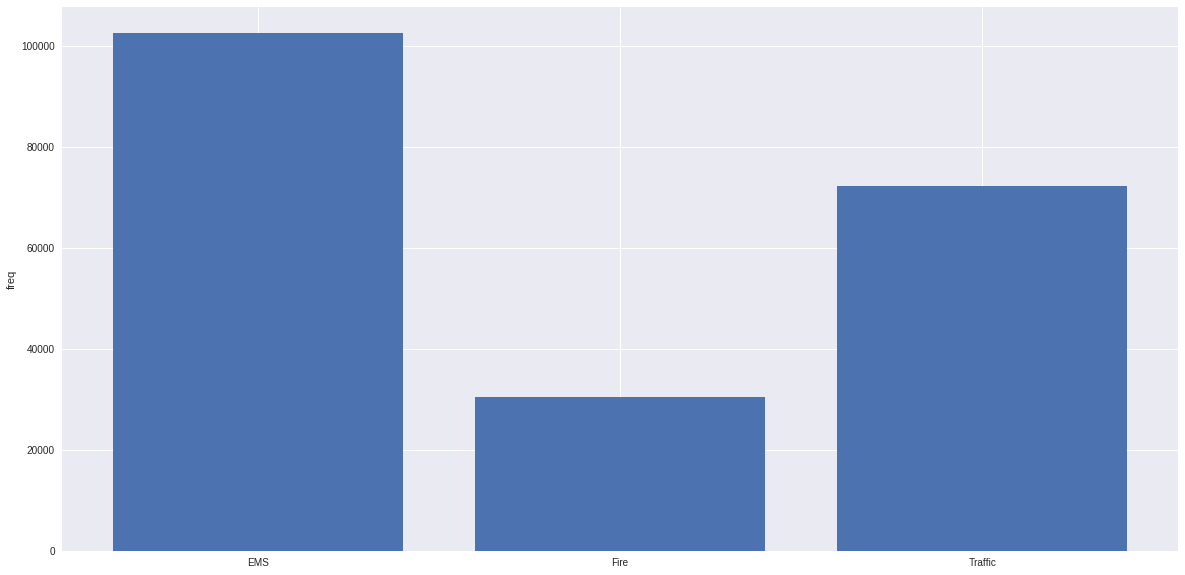

In [50]:
plt.figure(figsize = (20, 10))
y = np.arange(unique_cause.shape[0])
plt.bar(y, freq_cause)
plt.xticks(y, unique_cause)
plt.ylabel('freq')
plt.show()

In [53]:
timestamp = dataset['timeStamp'].values
for i in xrange(timestamp.shape[0]):
    if timestamp[i].find('2016-01-01') >= 0:
        print i
        break
        
for i in xrange(timestamp.shape[0]):
    if timestamp[i].find('2017-01-01') >= 0:
        print i
        break

7916
150276


In [54]:
timestamp = timestamp[7916: 150276]

In [57]:
timestamp

array(['2016-01-01 00:10:08', '2016-01-01 00:14:45', '2016-01-01 00:20:43',
       ..., '2016-12-31 23:35:28', '2016-12-31 23:45:47',
       '2016-12-31 23:49:35'], dtype=object)

In [62]:
heatmap = np.zeros((31, 24), dtype = int)
for i in xrange(timestamp.shape[0]):
    stamp = timestamp[i].split(' ')
    x = int(stamp[0][-2:]) - 1
    y = int(stamp[1][:2])
    heatmap[x, y] += 1

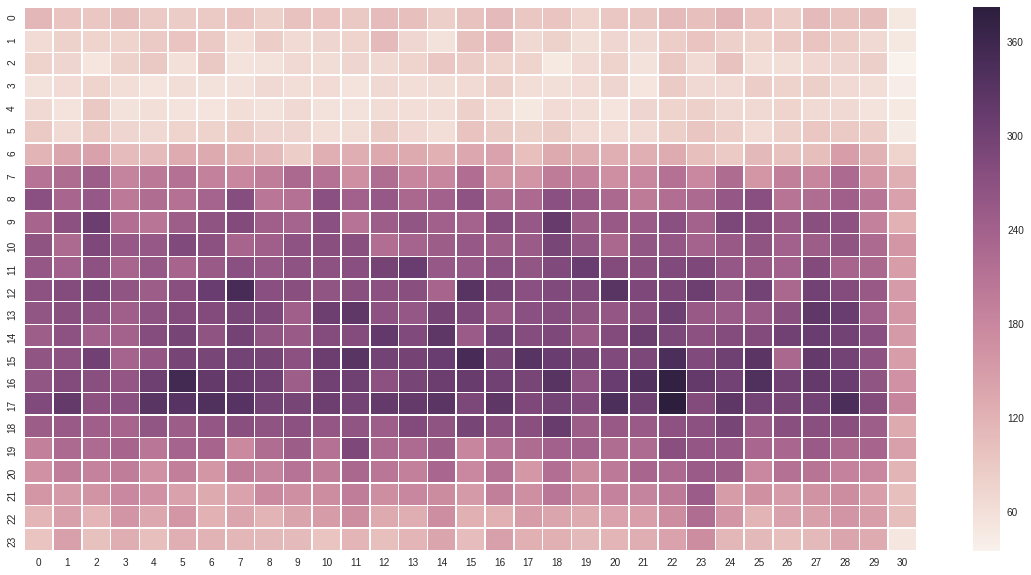

In [68]:
plt.figure(figsize = (20, 10))
sns.heatmap(heatmap.T, annot = False, fmt = "d", linewidths = .5)
plt.show()

In [70]:
heatmap = np.zeros((31, 12), dtype = int)
for i in xrange(timestamp.shape[0]):
    stamp = timestamp[i].split(' ')[0].split('-')
    x = int(stamp[2]) - 1
    y = int(stamp[1]) - 1
    heatmap[x, y] += 1

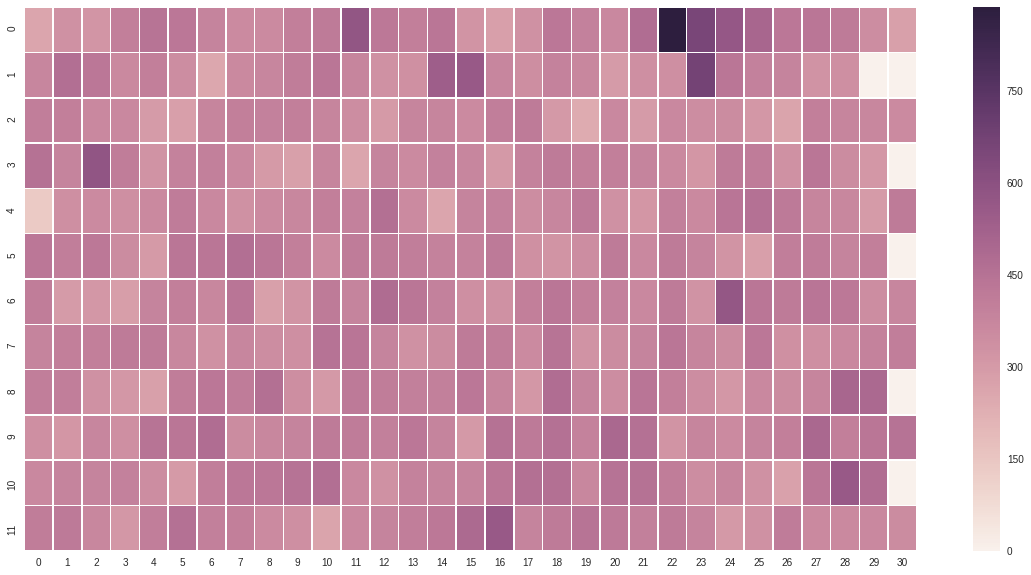

In [71]:
plt.figure(figsize = (20, 10))
sns.heatmap(heatmap.T, annot = False, fmt = "d", linewidths = .5)
plt.show()

In [72]:
datecause = dataset[['title', 'timeStamp']].values

In [74]:
heatmap_ems = np.zeros((31, 24), dtype = int)
heatmap_fire = np.zeros((31, 24), dtype = int)
heatmap_traffic = np.zeros((31, 24), dtype = int)
for i in xrange(datecause.shape[0]):
    stamp = datecause[i, 1].split(' ')
    x = int(stamp[0][-2:]) - 1
    y = int(stamp[1][:2])
    if datecause[i, 0] == 'EMS':
        heatmap_ems[x, y] += 1
    if datecause[i, 0] == 'Fire':
        heatmap_fire[x, y] += 1
    if datecause[i, 0] == 'Traffic':
        heatmap_traffic[x, y] += 1

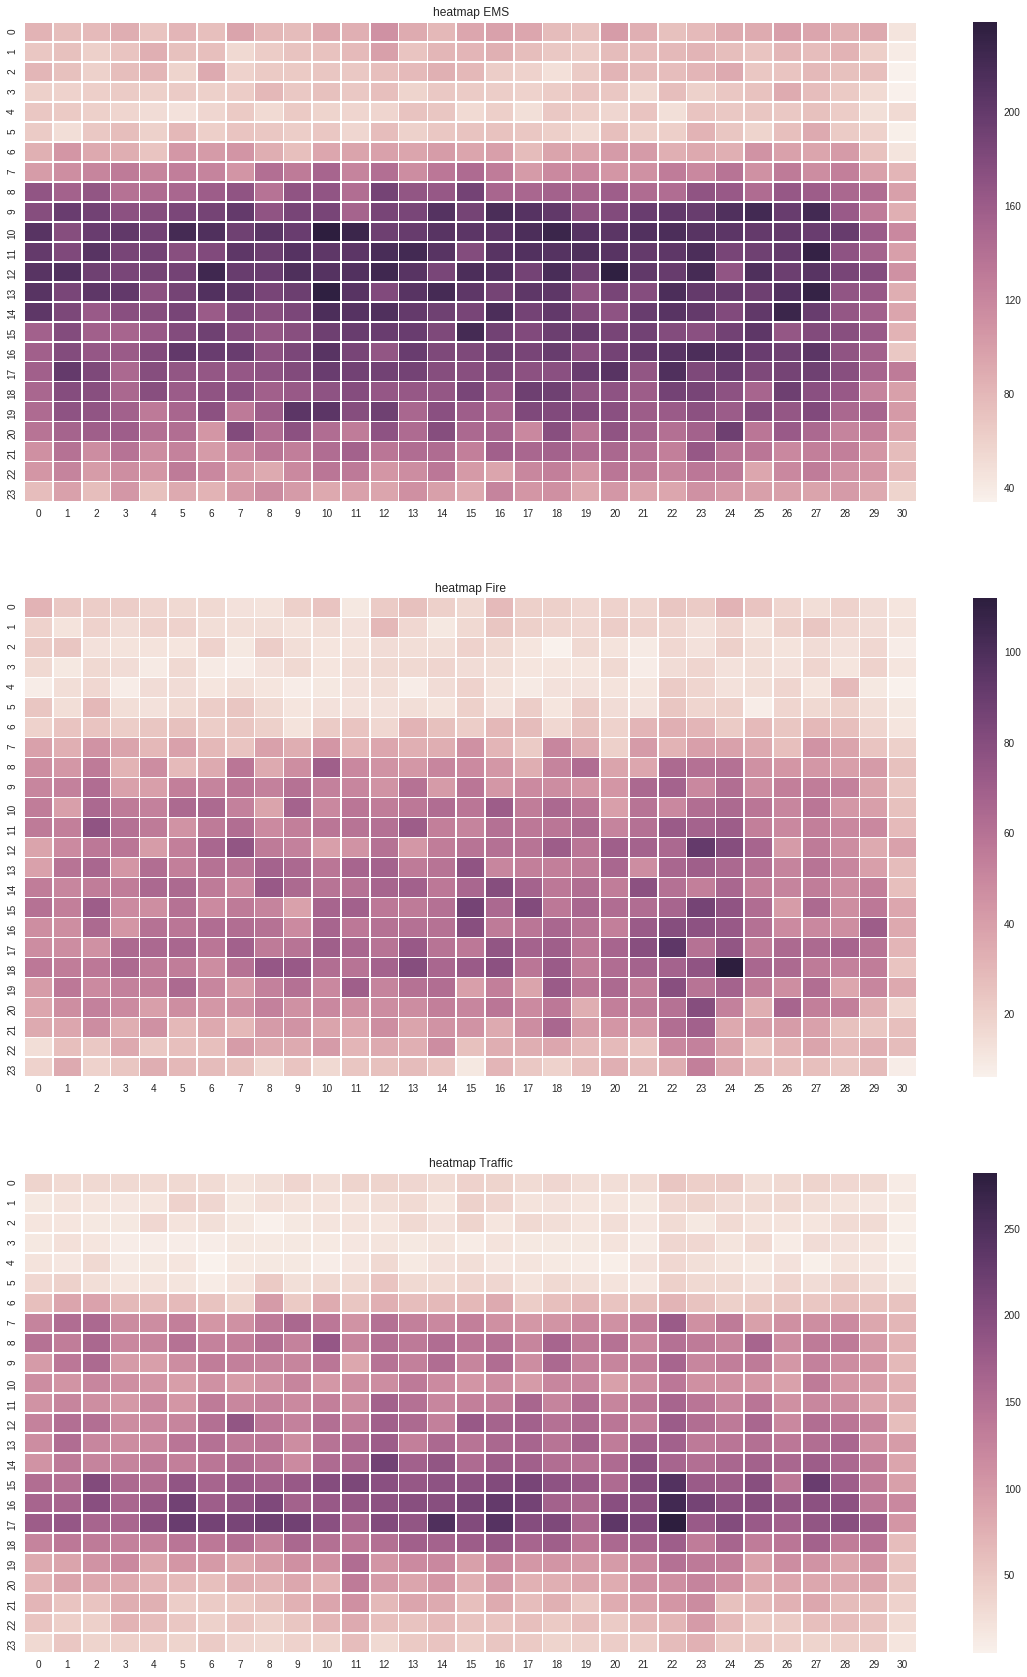

In [75]:
plt.figure(figsize = (20, 30))
plt.subplot(3, 1, 1)
sns.heatmap(heatmap_ems.T, annot = False, fmt = "d", linewidths = .5)
plt.title('heatmap EMS')
plt.subplot(3, 1, 2)
sns.heatmap(heatmap_fire.T, annot = False, fmt = "d", linewidths = .5)
plt.title('heatmap Fire')
plt.subplot(3, 1, 3)
sns.heatmap(heatmap_traffic.T, annot = False, fmt = "d", linewidths = .5)
plt.title('heatmap Traffic')
plt.show()